In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

price_data = pd.read_csv("/Users/andrewlee/NotebookSamples/Datasets/newDailyPricesTechCompanies.csv")


In [2]:
price_data.head()

,date,1. open,2. high,3. low,4. close,5. volume,TickerName
0,2023-10-20,0.8800,0.9000,0.880,0.9000,531677,KSCP
1,2023-10-19,0.9301,0.9500,0.880,0.8802,1023308,KSCP
2,2023-10-18,0.9191,0.9699,0.880,0.9277,638286,KSCP
3,2023-10-17,0.9060,0.9796,0.906,0.9200,773394,KSCP
4,2023-10-16,0.8700,0.9395,0.851,0.9291,701309,KSCP


In [3]:
price_data.columns = ["date", "open", "high", "low", "close", "volume", "TickerName"]
price_data.head()


,date,open,high,low,close,volume,TickerName
0,2023-10-20,0.8800,0.9000,0.880,0.9000,531677,KSCP
1,2023-10-19,0.9301,0.9500,0.880,0.8802,1023308,KSCP
2,2023-10-18,0.9191,0.9699,0.880,0.9277,638286,KSCP
3,2023-10-17,0.9060,0.9796,0.906,0.9200,773394,KSCP
4,2023-10-16,0.8700,0.9395,0.851,0.9291,701309,KSCP


In [4]:
fixed_data = pd.DataFrame()

for ticker in price_data["TickerName"].unique():
    print(ticker)
    
    # Filter the data for the current ticker
    current_ticker_data = price_data[price_data["TickerName"] == ticker]
    
    # Sort the data by date
    current_ticker_data = current_ticker_data.sort_values(by="date", ascending=True, ignore_index=True)
    
    print(current_ticker_data)
    
    # Calculate price change
    dummy = np.array(current_ticker_data["close"])
    per_change = (dummy[:-1] - dummy[1:]) / dummy[:-1]
    
    # Remove the first row
    current_ticker_data = current_ticker_data.iloc[1:, :]

    # Update the 'close' column with price changes
    current_ticker_data["close"] = per_change
    
    # Concatenate the current ticker data to the fixed_data
    fixed_data = pd.concat([fixed_data, current_ticker_data], ignore_index=True)



KSCP
           date     open     high     low    close    volume TickerName
0    2022-01-27  14.4400  15.4800   5.910   5.9100   1608576       KSCP
1    2022-01-28   7.0700  16.2900   6.330  16.2900  26574308       KSCP
2    2022-01-31  19.1551  27.5000  18.350  21.4000  42899912       KSCP
3    2022-02-01  15.9500  17.6000  12.100  12.4400  18493106       KSCP
4    2022-02-02  12.3549  12.3549   9.400   9.5500  12613046       KSCP
..          ...      ...      ...     ...      ...       ...        ...
431  2023-10-16   0.8700   0.9395   0.851   0.9291    701309       KSCP
432  2023-10-17   0.9060   0.9796   0.906   0.9200    773394       KSCP
433  2023-10-18   0.9191   0.9699   0.880   0.9277    638286       KSCP
434  2023-10-19   0.9301   0.9500   0.880   0.8802   1023308       KSCP
435  2023-10-20   0.8800   0.9000   0.880   0.9000    531677       KSCP

[436 rows x 7 columns]
ASST
           date    open    high     low   close   volume TickerName
0    2023-02-03  5.8800  6.9800  3

In [5]:
fixed_data

,date,open,high,low,close,volume,TickerName
0,2022-01-28,7.0700,16.2900,6.3300,-1.756345,26574308,KSCP
1,2022-01-31,19.1551,27.5000,18.3500,-0.313689,42899912,KSCP
2,2022-02-01,15.9500,17.6000,12.1000,0.418692,18493106,KSCP
3,2022-02-02,12.3549,12.3549,9.4000,0.232315,12613046,KSCP
4,2022-02-03,8.9700,10.8000,8.6100,0.070157,8704423,KSCP
...,...,...,...,...,...,...,...
1449,2023-10-16,0.4000,0.4125,0.3800,0.115017,18502,MGAM
1450,2023-10-17,0.3800,0.4050,0.3700,0.026572,61284,MGAM
1451,2023-10-18,0.3650,0.3950,0.3551,0.040000,30250,MGAM
1452,2023-10-19,0.3500,0.3775,0.3400,-0.038851,64087,MGAM


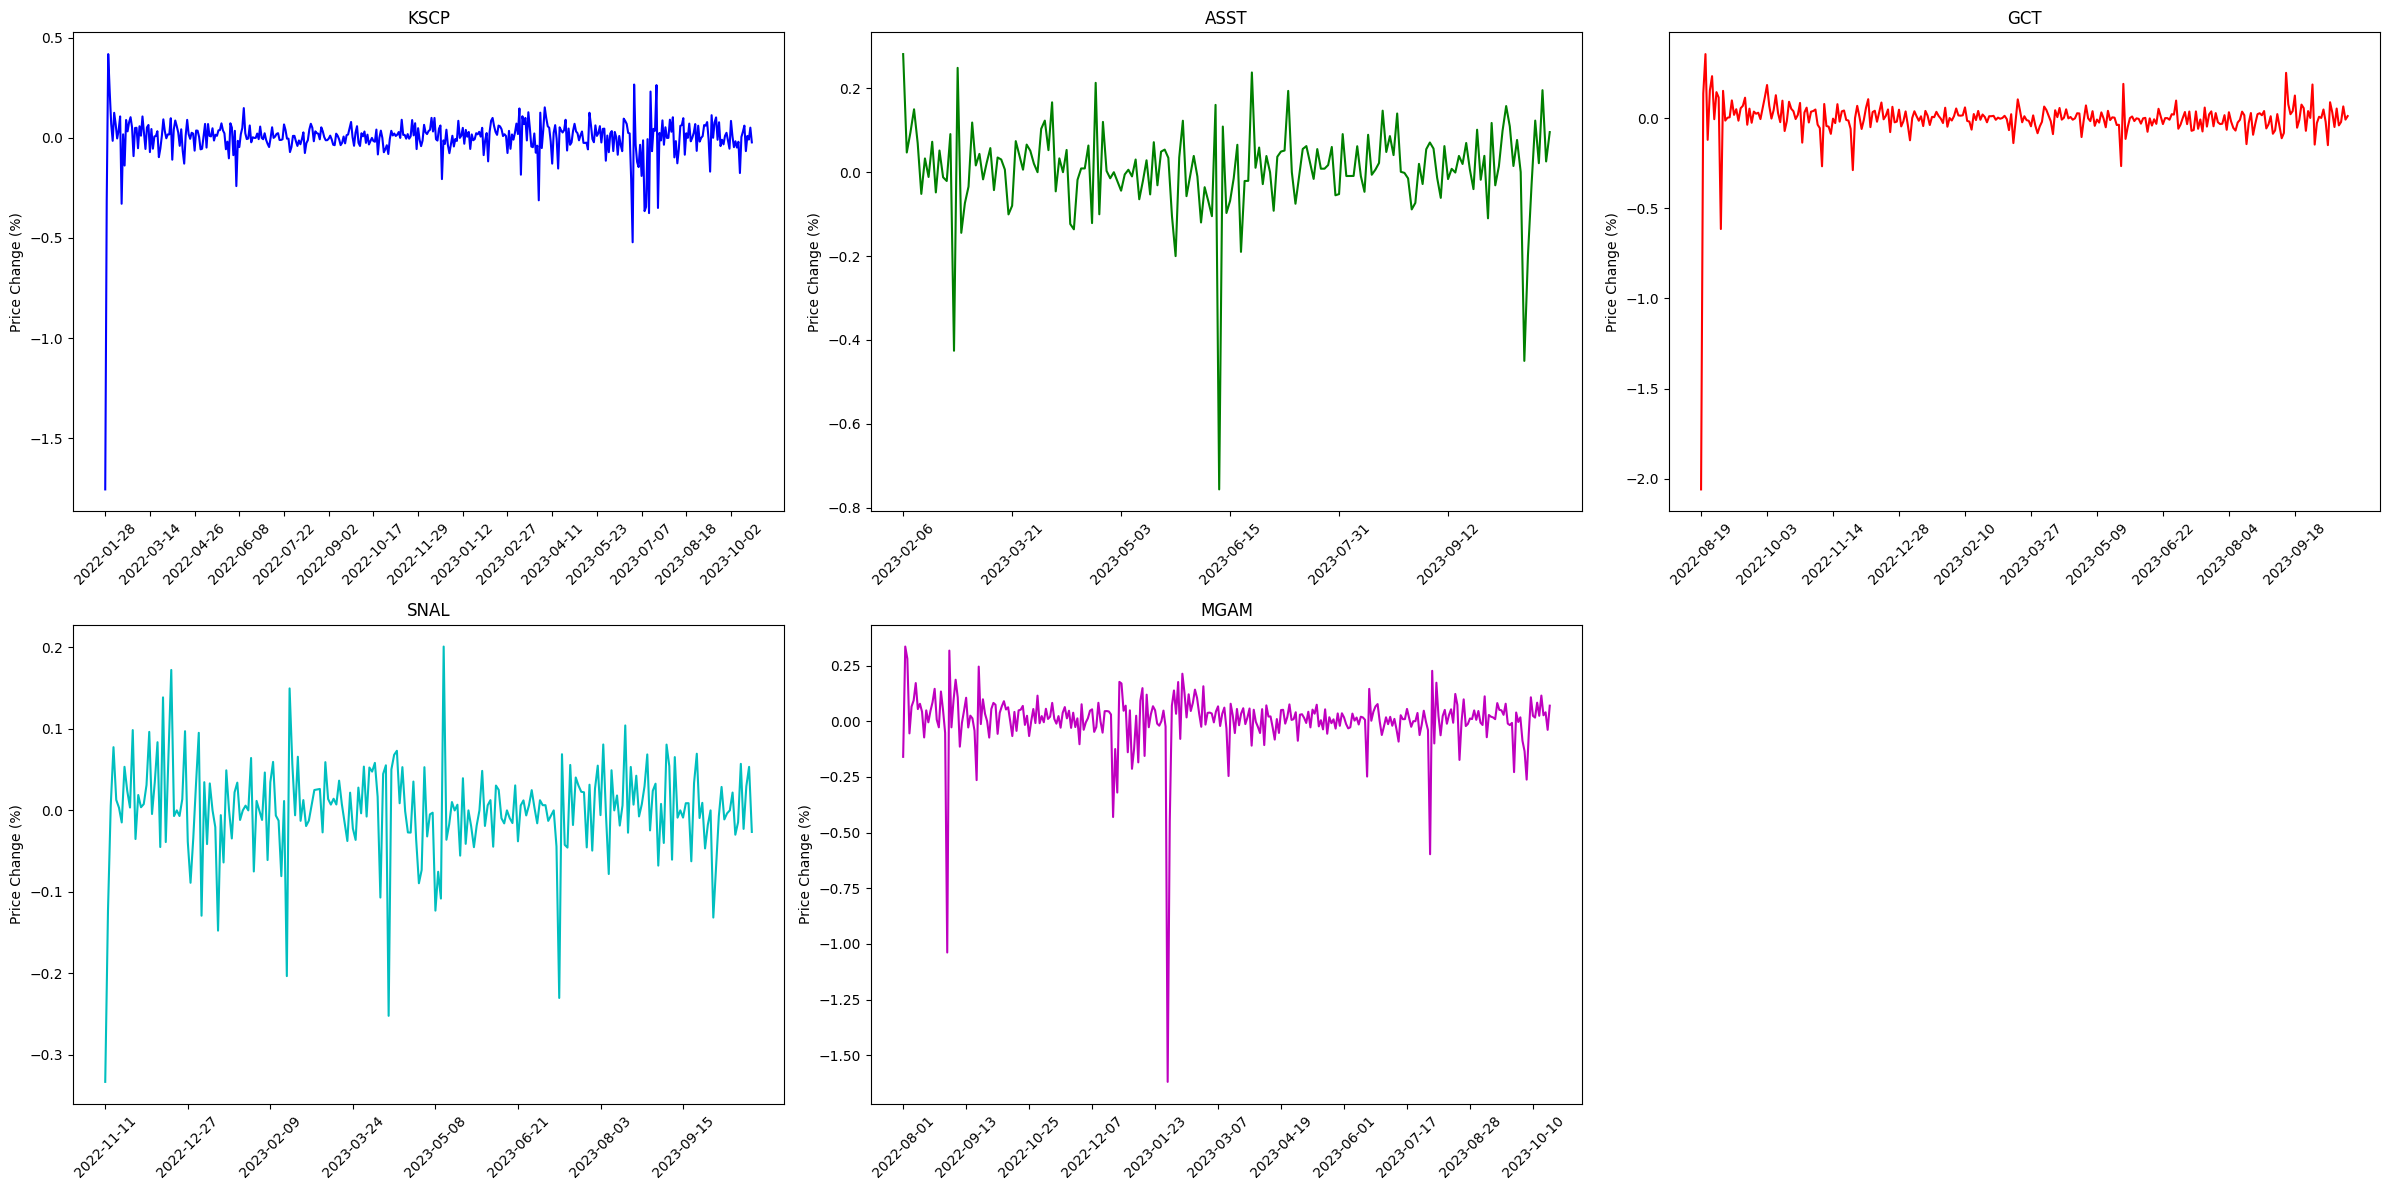

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(24, 12))
colors = ["b", "g", "r", "c", "m"]

# Get unique ticker names
unique_tickers = fixed_data["TickerName"].unique()

for index, i in enumerate(unique_tickers):  # Exclude the last ticker
    # Calculate row and column indices for the subplot
    row_index, col_index = divmod(index, 3)
    
    # Select the appropriate subplot using row and column indices
    ax = axes[row_index, col_index]
    
    temporary = fixed_data[fixed_data["TickerName"] == i]

    # Plot data on the selected subplot
    ax.plot(temporary["date"], temporary["close"], label=i, color=colors[index])
    ax.set_xticks(temporary["date"].unique()[0:len(temporary["date"].unique()):30])
    ax.set_ylabel("Price Change (%)")
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    ax.set_title(i)  # Set subplot title if needed


# Remove the last subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()  # Adjust subplot layout
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller, acf, pacf

adf_results = {}
acf_results = {}
pacf_results = {}
significant_values = {}

for i in fixed_data["TickerName"].unique():
    
    temporary = fixed_data[fixed_data["TickerName"] == i]
    
    adf_results[i] = adfuller(temporary["close"])
    acf_results[i] = acf(temporary["close"], nlags=20, fft=False)
    pacf_results[i] = pacf(temporary["close"], nlags=20)
    significant_values[i] = (1.65/np.sqrt(len(temporary["close"])))

adf_results = pd.DataFrame(adf_results)
acf_results = pd.DataFrame(acf_results)
pacf_results = pd.DataFrame(pacf_results)
significant_values = pd.DataFrame(significant_values, index=[0])

In [9]:
adf_results

,KSCP,ASST,GCT,SNAL,MGAM
0,-4.67319,-8.603495,-8.831038,-17.783041,-16.537129
1,0.000094,0.0,0.0,0.0,0.0
2,17,1,3,0,0
3,417,177,291,235,308
4,"{'1%': -3.446129402876608, '5%': -2.8684960761...","{'1%': -3.467845319799907, '5%': -2.8780117454...","{'1%': -3.4530232710482367, '5%': -2.871523926...","{'1%': -3.4584868856997004, '5%': -2.873918902...","{'1%': -3.45176116018037, '5%': -2.87097009360..."
5,-964.214144,-276.948089,-759.379001,-647.490728,-290.164076


### In order to determine whether our data is suitable for an ARMA model (or determine which model), we must consider several factors and perform certain analyses:

- White Noise: Need to check if we can actually build a model to predict values.
- Stationarity Check: ARMA models require the underlying time series data to be stationary. Stationarity means that the statistical properties of the data, such as mean, variance, and autocorrelation, remain constant over time. WE can perform a stationarity check by conducting statistical tests such as the Augmented Dickey-Fuller (ADF) test. If the data is non-stationary, it needs to be transformed or differenced to achieve stationarity (in the ARIMA model we would difference lags to flatten the data).
- Trend and Seasonality Analysis: Examine the time series data for any discernible trends or seasonality patterns. Trends can be identified through visual inspection of the data or by using techniques like moving averages. Seasonality refers to repetitive patterns that occur at fixed intervals, such as daily, weekly, or monthly. If significant trends or seasonality exist, additional preprocessing steps may be required, such as detrending or deseasonalizing the data.
- Autocorrelation Analysis: Check for autocorrelation in the time series data. Autocorrelation measures the relationship between a data point and its lagged values. Plotting the autocorrelation function (ACF) and partial autocorrelation function (PACF) can help identify the lag values that exhibit significant correlations. This analysis helps determine the appropriate order of differencing and the lag values to consider in the ARMA model.

### Assessing the conditon of White Noise
- White noise can be defined as data points that cannot be predicted all of the variance is caused by random or ummodelable phenomena. If it is the case that our data is white noise, we cannot create a model to try and fit values.

### Visually checking to see if this is simply white noise:
- Constant variance: For the most part, our ticker percent changes have constant variance (suggesting we need to to further analysis)
- Mean: Is 0 (also suggesting we need to to further analysis namely looking at the ACF)

### Utilizing the ACF to assess:



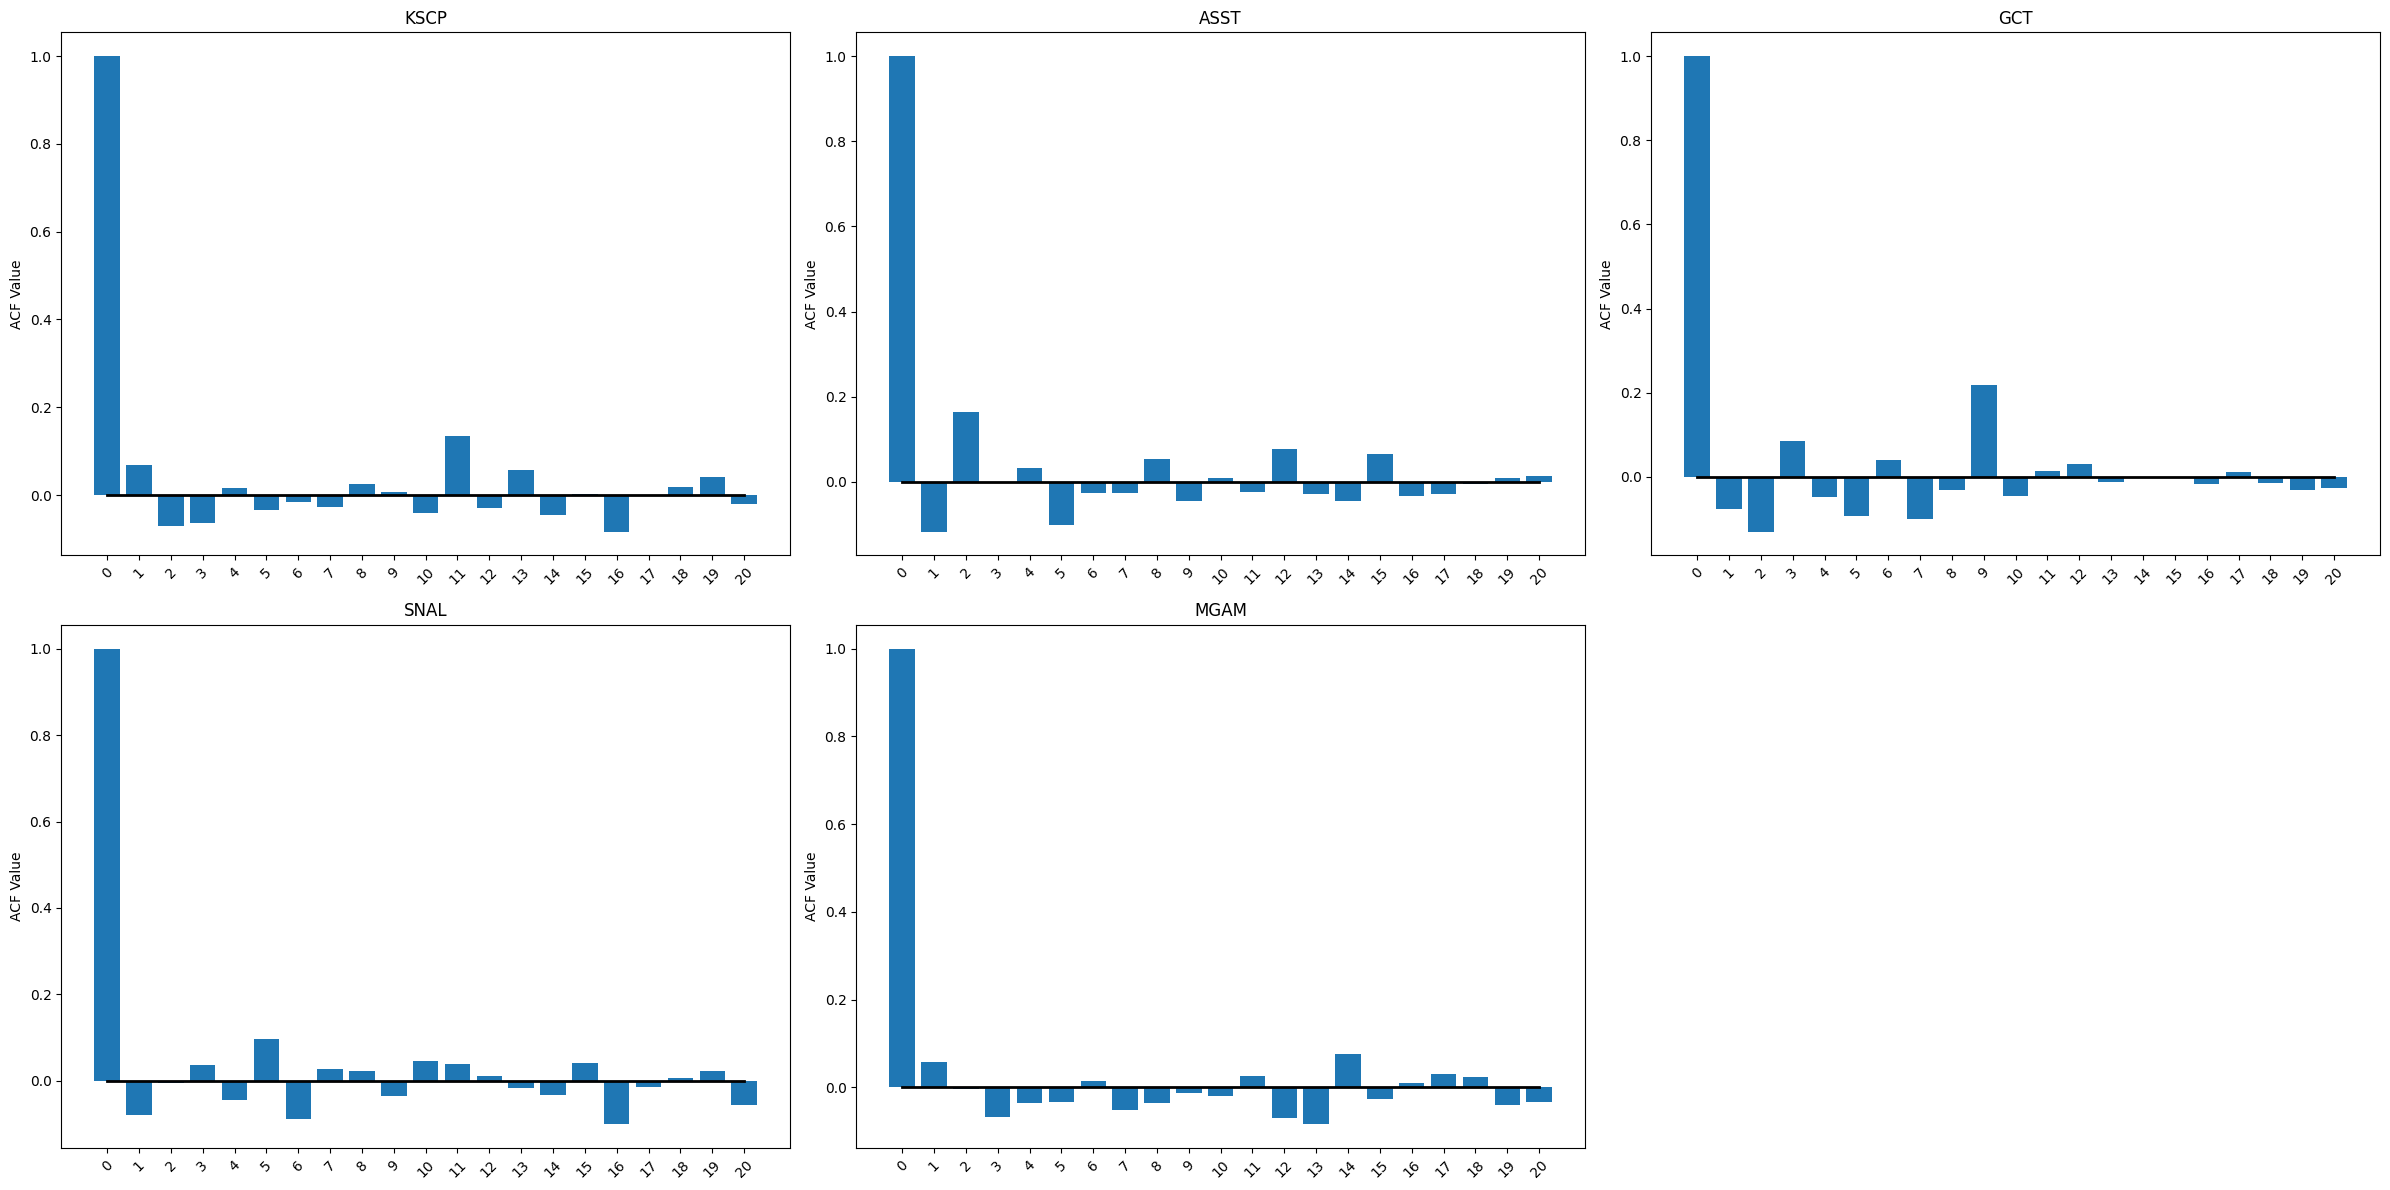

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(24, 12))

# Get unique ticker names
unique_tickers = fixed_data["TickerName"].unique()

for index, i in enumerate(unique_tickers):  # Exclude the last ticker
    # Calculate row and column indices for the subplot
    row_index, col_index = divmod(index, 3)
    
    # Select the appropriate subplot using row and column indices
    ax = axes[row_index, col_index]
    
    temporary = acf_results[i]

    # Plot data on the selected subplot
    ax.bar(np.arange(len(temporary)), temporary, label=i)
    ax.plot(np.arange(len(temporary)), 0 * np.arange(len(temporary)), color="black", linewidth=2)
    ax.set_xticks(np.arange(len(temporary)))
    ax.set_ylabel("ACF Value")
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    ax.set_title(i) 


# Remove the last subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()  # Adjust subplot layout
plt.show()

## Stationarity/Seasonality

- Conducting a visual analysis of our price plots, we can see that mean and variance of the distributions seem to stay relatively constant and we cannot observe and seasonal patterns. Visually our tickers pass this test.
- HOWEVER to truly assess the stationarity of our data, we must perform an ADF test